In [1]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.visualization.plot_embeddings import *
from src.models.beta import *
from src.models.lognorm import *

In [ ]:
beta_model = BetaWSBM(K = 2,
				 ρ = 0.1,
				 π = np.array([0.25, 0.75]),
				 n = 1000,
				 α = np.array([[0.1, 0.9], [0.9, 1]]))

beta_parameters = [(np.array([[0.1, 0.9], 
							   [0.9, 1  ]]),), 
					(np.array([[0.2, 0.8], 
							   [0.8, 1  ]]),),
					(np.array([[0.3, 0.7], 
							   [0.7, 1  ]]),),
					(np.array([[0.4, 0.6], 
							   [0.6, 1  ]]),)]

transforms = [IdentityTransform(), LogTransform(), QuantileTransform(0.25), PowerTransform(2)]

beta_instances = sample_instances(beta_model, beta_parameters, transforms)

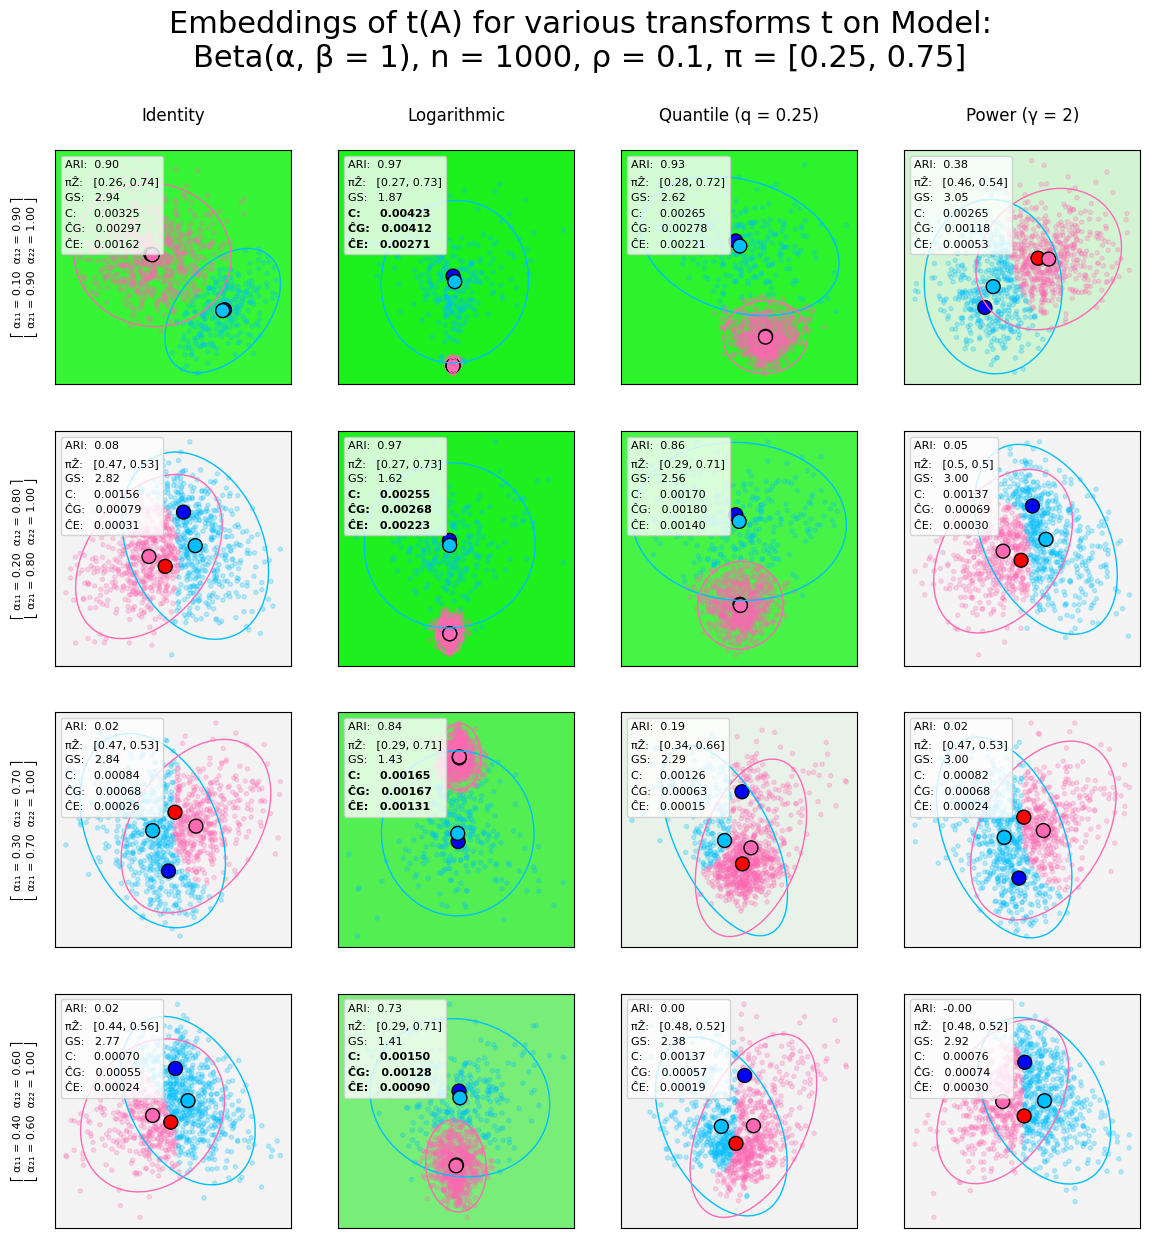

In [ ]:
plot_embeddings(beta_instances,
				Z_display='P',
				M_display='TP',
				Σ_display='P')

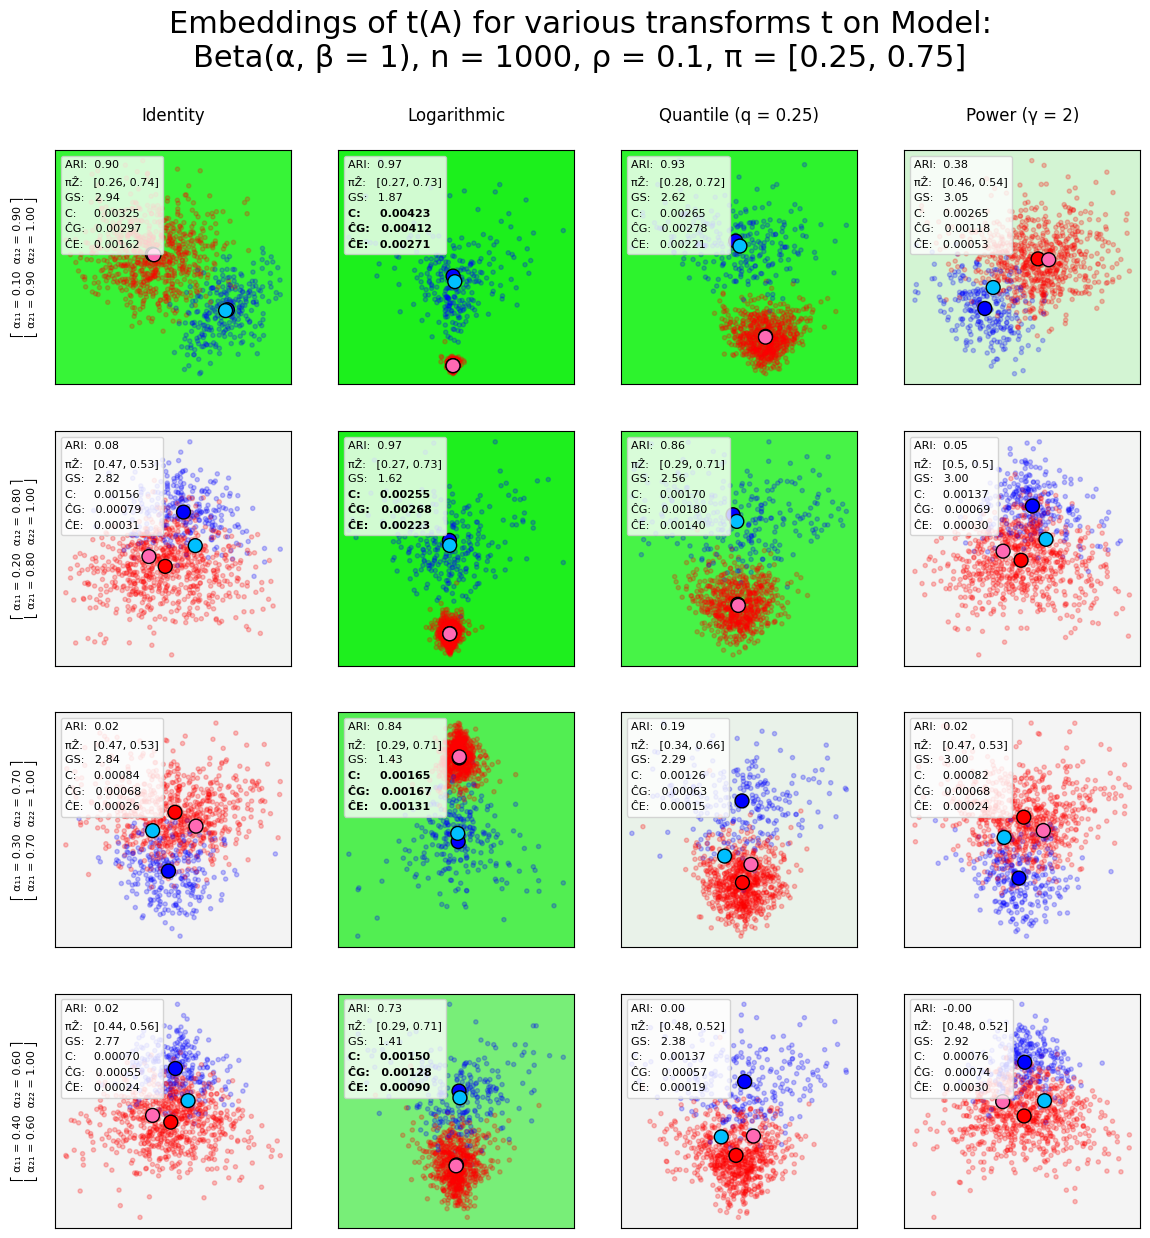

In [ ]:
plot_embeddings(beta_instances,
				Z_display='T',
				M_display='TP')

In [3]:
μ = LognormWSBM.mu_for_quantile_at_zero(σ=1, quantile=0.99)

lognorm_model = LognormWSBM(K = 2,
				 ρ = 0.25,
				 π = np.array([0.5, 0.5]),
				 n = 1000,
				 Σ = np.array([[0.1, 0.9], [0.9, 1]]),
                 μ = μ)

lognorm_parameters = [(np.array([[0.1, 0.9], 
							   [0.9, 1  ]]), μ), 
					(np.array([[0.2, 0.8], 
							   [0.8, 1  ]]), μ),
					(np.array([[0.3, 0.7], 
							   [0.7, 1  ]]), μ),
					(np.array([[0.4, 0.6], 
							   [0.6, 1  ]]), μ)]

transforms = [IdentityTransform(), LogTransform(), QuantileTransform(0.25), PowerTransform(2)]

lognorm_instances = sample_instances(lognorm_model, lognorm_parameters, transforms)

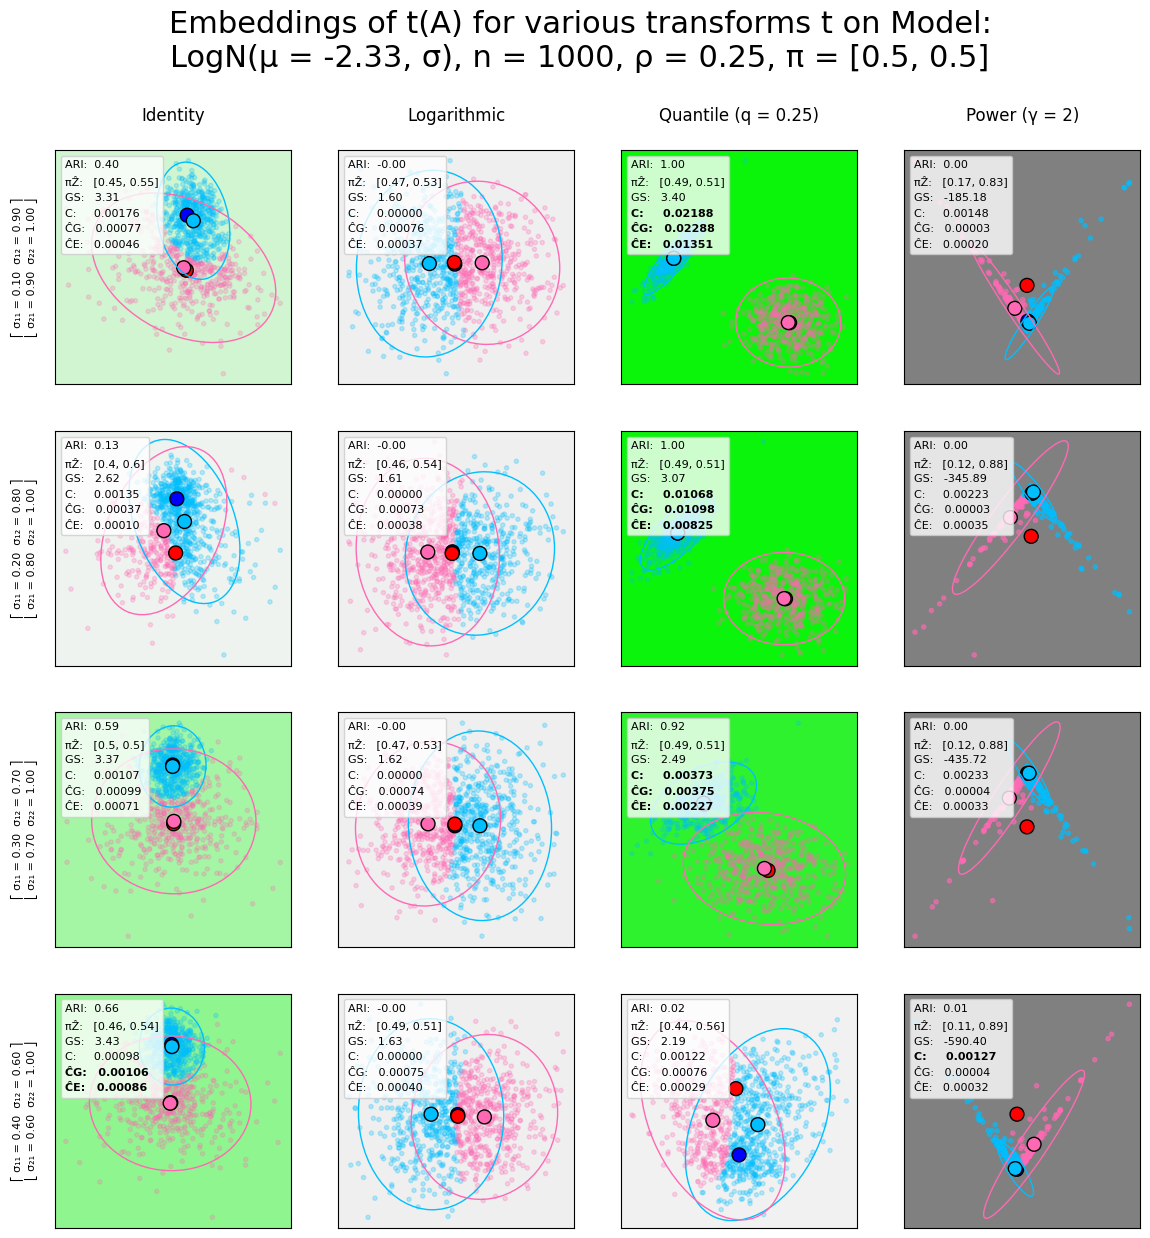

In [5]:
plot_embeddings(lognorm_instances,
				Z_display='P',
				M_display='TP',
				Σ_display='P')

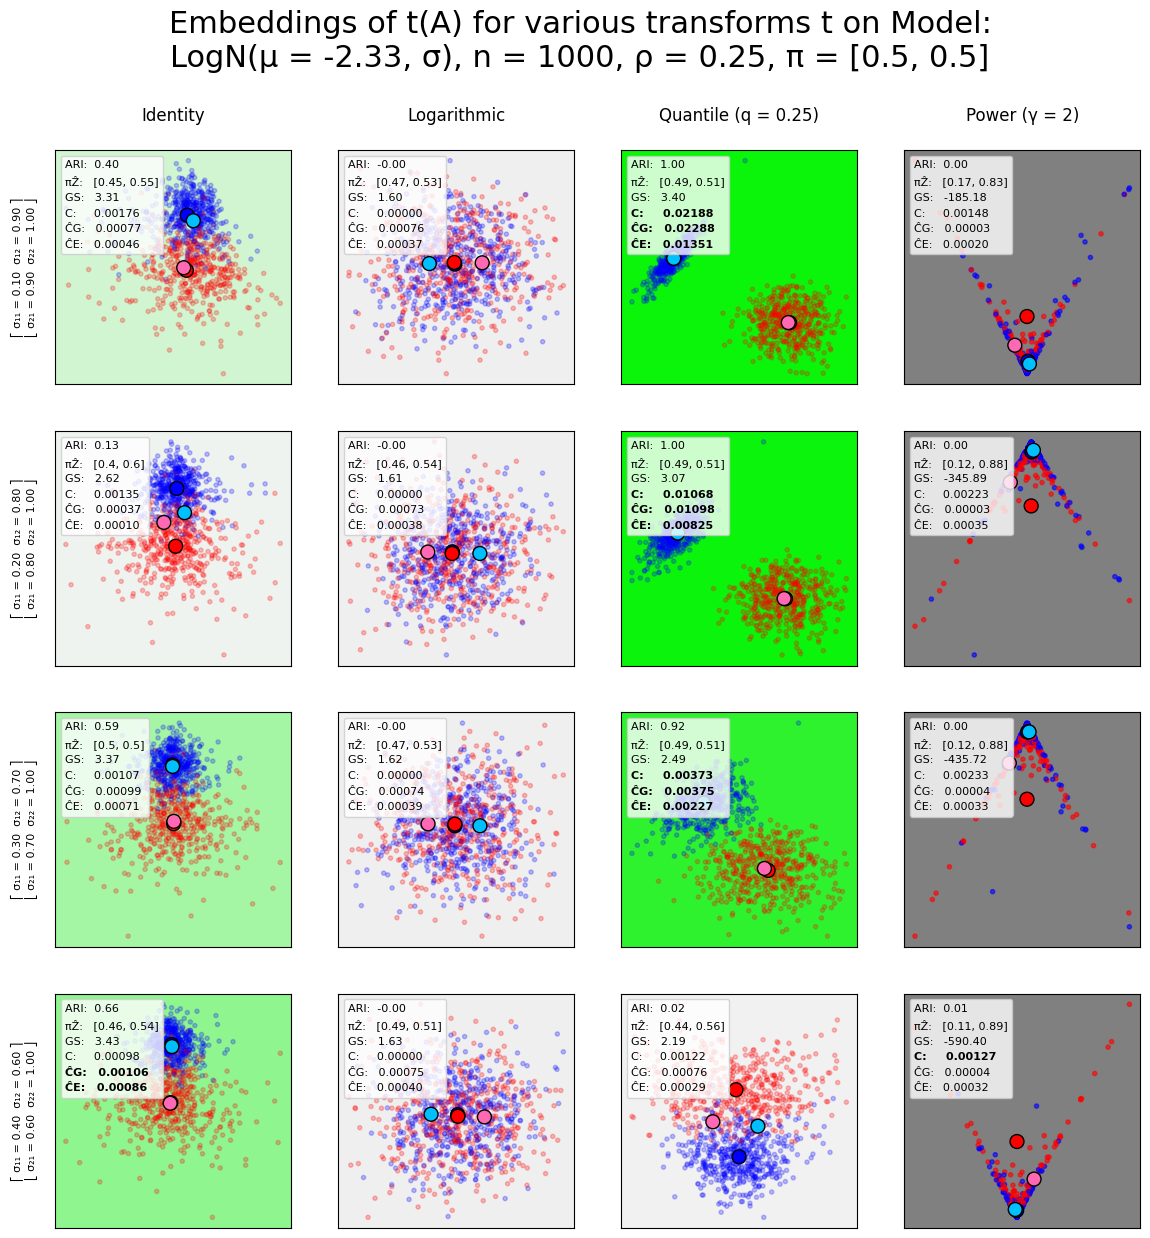

In [6]:
plot_embeddings(lognorm_instances,
				Z_display='T',
				M_display='TP')